In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
# kaggle apiのダウンロード
# !pip install kaggle

In [3]:
#!kaggle competitions download -c g-research-crypto-forecasting

In [4]:
# import os
# import shutil

# # 現在のディレクトリ
# print(os.getcwd())
# # 現在のディレクトリを移動
# # os.chdir('../')
# # ファイル移動
# shutil.move('./g-research-crypto-forecasting.zip', '../Dataset/g-research-crypto-forecasting.zip')
# # !unzip ../Dataset/g-research-crypto-forecasting.zip

In [5]:
df = pd.read_csv('C://Users/seiju/Downloads/Ethereum.csv')
df

,日付け,終値,始値,高値,安値,出来高,前日比%
0,2022年02月05日,"3,016.29","2,994.74","3,035.68","2,963.11",713.06K,0.71%
1,2022年02月04日,"2,994.99","2,692.80","2,994.99","2,671.72",908.75K,11.22%
2,2022年02月03日,"2,692.80","2,680.66","2,723.97","2,579.80",549.27K,0.44%
3,2022年02月02日,"2,681.00","2,787.16","2,809.57","2,618.07",602.40K,-3.81%
4,2022年02月01日,"2,787.16","2,686.82","2,808.60","2,676.32",521.74K,3.73%
...,...,...,...,...,...,...,...
1857,2017年01月05日,10.15,11.16,11.70,9.20,490.64K,-7.73%
1858,2017年01月04日,11.00,9.57,11.10,9.44,556.25K,12.94%
1859,2017年01月03日,9.74,8.43,9.90,8.30,603.42K,16.37%
1860,2017年01月02日,8.37,8.19,8.50,8.11,101.27K,2.07%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日付け     1862 non-null   object
 1   終値      1862 non-null   object
 2   始値      1862 non-null   object
 3   高値      1862 non-null   object
 4   安値      1862 non-null   object
 5   出来高     1862 non-null   object
 6   前日比%    1862 non-null   object
dtypes: object(7)
memory usage: 102.0+ KB


In [7]:
df['高値'] = df['高値'].astype(str)
df['高値'] = df['高値'].str.replace(',', '').str.replace('-', '').str.replace(':', '').str.replace(' ', '').str.replace('\'', '').str.replace('"', '')
df["高値"] = pd.to_numeric(df["高値"], errors='raise')
df['日付け'] = df['日付け'].str.replace('年', '-').str.replace('月', '-').str.replace('日', '-')
df['日付け'] = pd.to_datetime(df['日付け'])
df = df.sort_values('日付け')
df['前日比%'] = df['前日比%'].str.replace('%', '')
df["前日比%"] = pd.to_numeric(df["前日比%"], errors='raise')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862 entries, 1861 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日付け     1862 non-null   datetime64[ns]
 1   終値      1862 non-null   object        
 2   始値      1862 non-null   object        
 3   高値      1862 non-null   float64       
 4   安値      1862 non-null   object        
 5   出来高     1862 non-null   object        
 6   前日比%    1862 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 116.4+ KB


In [8]:
df

,日付け,終値,始値,高値,安値,出来高,前日比%
1861,2017-01-01,8.20,8.17,8.59,8.03,144.92K,2.50
1860,2017-01-02,8.37,8.19,8.50,8.11,101.27K,2.07
1859,2017-01-03,9.74,8.43,9.90,8.30,603.42K,16.37
1858,2017-01-04,11.00,9.57,11.10,9.44,556.25K,12.94
1857,2017-01-05,10.15,11.16,11.70,9.20,490.64K,-7.73
...,...,...,...,...,...,...,...
4,2022-02-01,"2,787.16","2,686.82",2808.60,"2,676.32",521.74K,3.73
3,2022-02-02,"2,681.00","2,787.16",2809.57,"2,618.07",602.40K,-3.81
2,2022-02-03,"2,692.80","2,680.66",2723.97,"2,579.80",549.27K,0.44
1,2022-02-04,"2,994.99","2,692.80",2994.99,"2,671.72",908.75K,11.22


In [9]:
# df['高値'] = df['高値'] * 110
# df['積立額'] = 10000
# df
# print(type(df['日付け'][0]))
# df['日付け'][1096:]

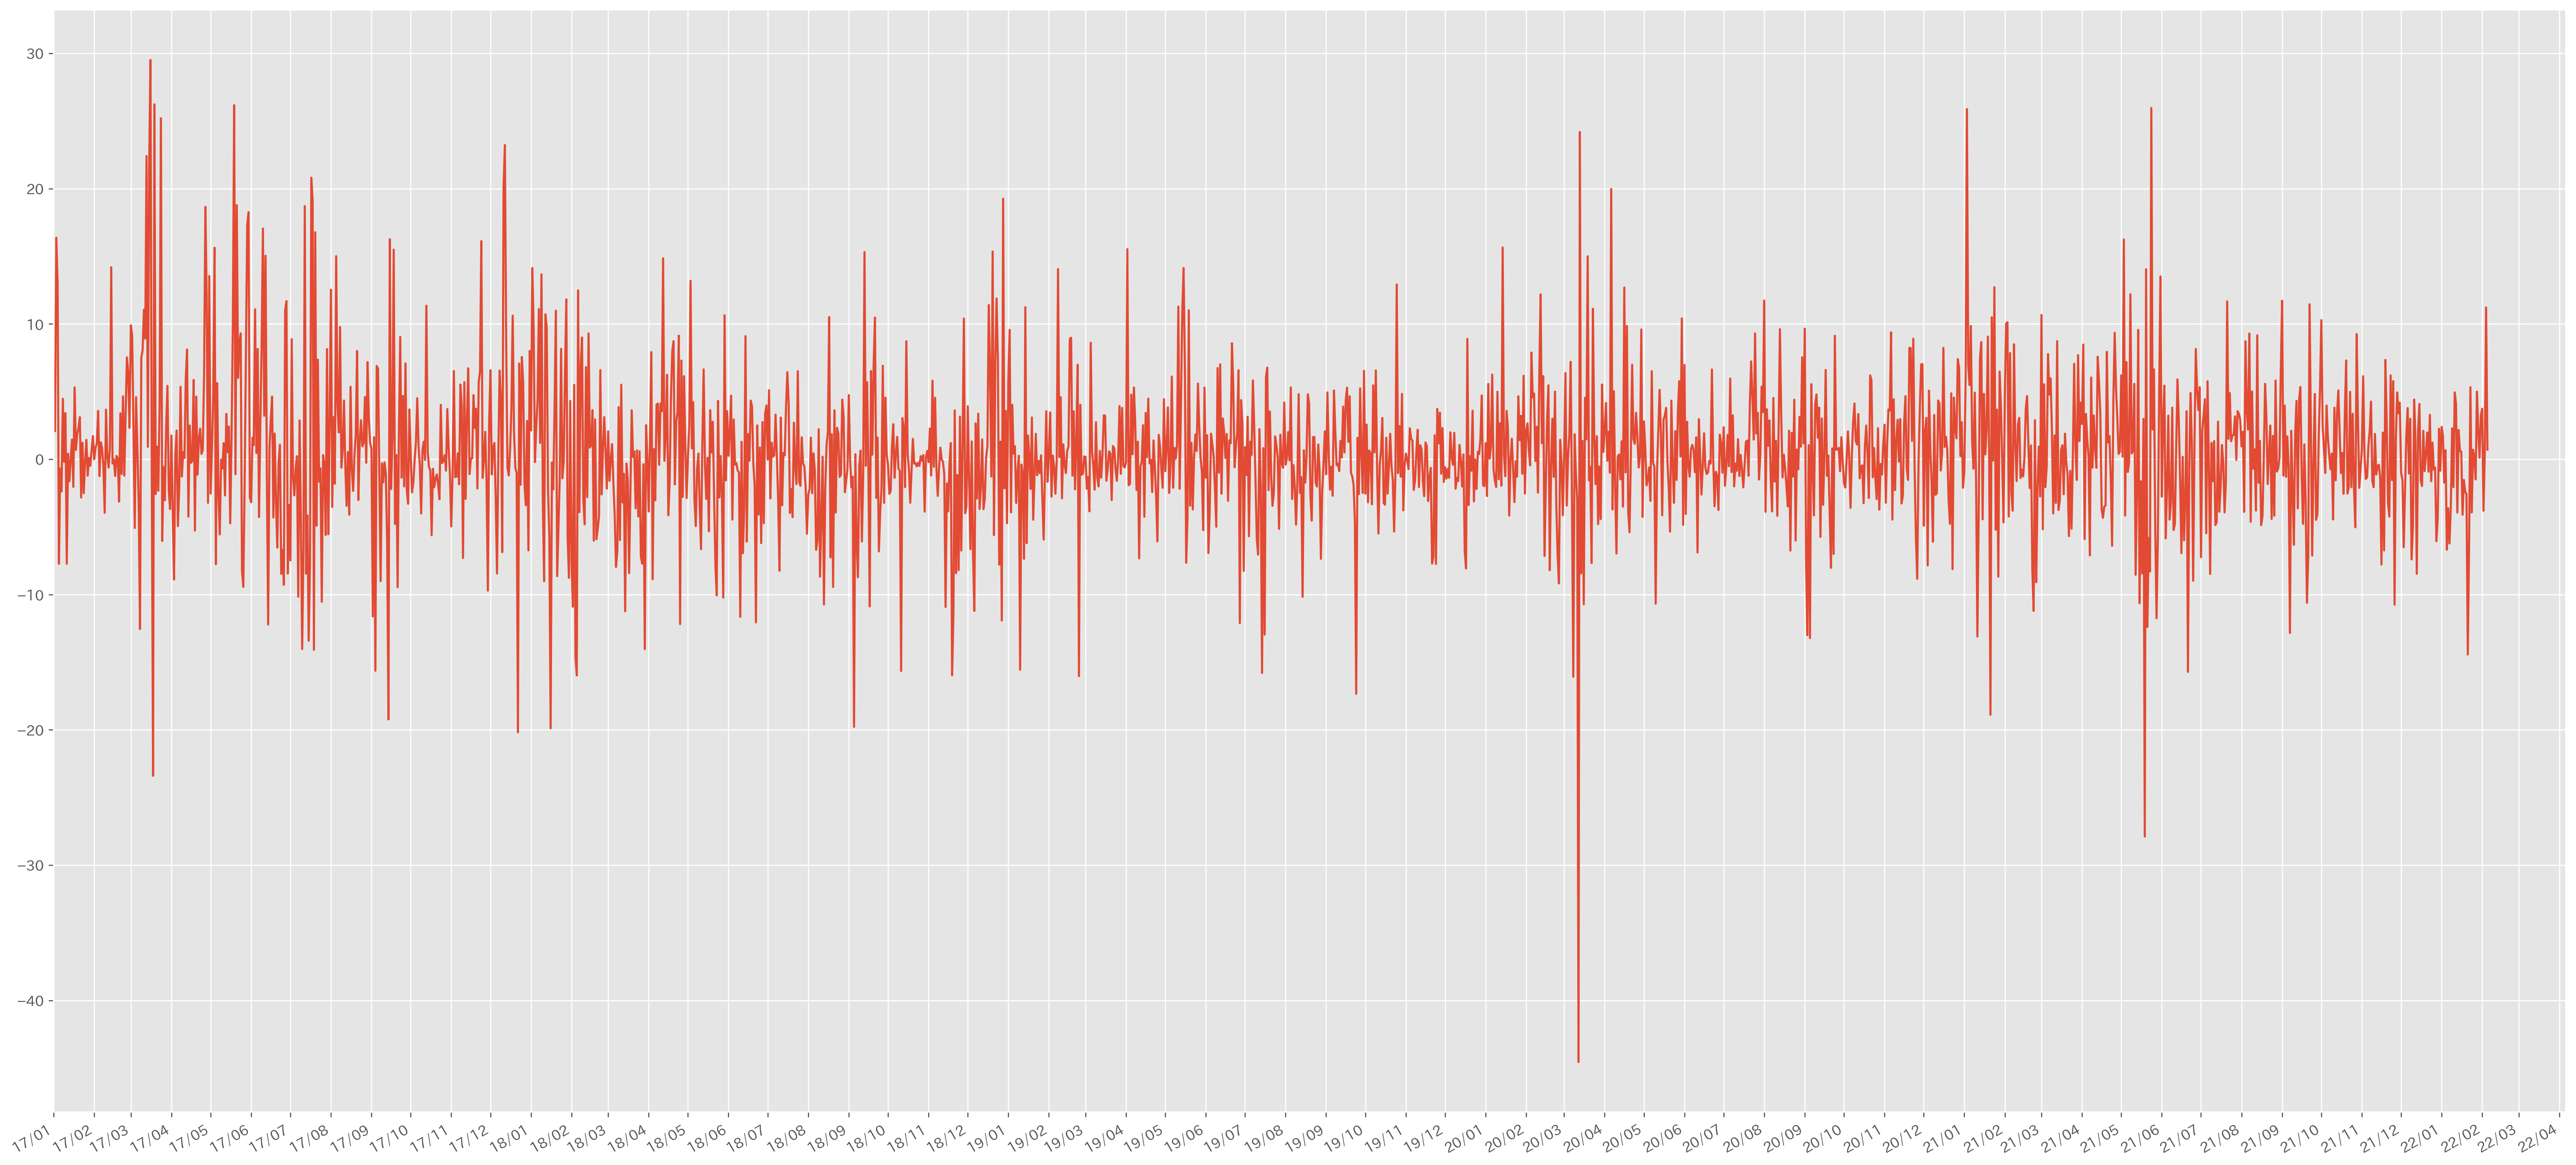

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import japanize_matplotlib
plt.style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates
import datetime as dt

plt.figure(figsize=(32, 16), dpi=300)

plt.xticks(rotation=60) #横軸目盛りを60度傾ける

xmin = dt.datetime.strptime('2017-01-01', '%Y-%m-%d')
xmax = dt.datetime.today().date()
plt.xlim([xmin,xmax])

# 日付表示フォーマット変更用
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y/%m"))

# 日付目盛インターバル変更用
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# 日付目盛のフォーマットを自動でしてくれる
plt.gcf().autofmt_xdate()

plt.plot(df['日付け'], df['前日比%'])
plt.show()

In [11]:


year = [2017, 2018, 2019, 2020, 2021, 2022]

def get_first_date(year, month):
    return dt.date(year, month, 1)

print(get_first_date(2019, 1))
print(type(get_first_date(2019, 1)))
print(pd.to_datetime('20190101'))
print()
for i in year:
    for j in range(11):
        print(get_first_date(i, j+1))

2019-01-01
<class 'datetime.date'>
2019-01-01 00:00:00

2017-01-01
2017-02-01
2017-03-01
2017-04-01
2017-05-01
2017-06-01
2017-07-01
2017-08-01
2017-09-01
2017-10-01
2017-11-01
2018-01-01
2018-02-01
2018-03-01
2018-04-01
2018-05-01
2018-06-01
2018-07-01
2018-08-01
2018-09-01
2018-10-01
2018-11-01
2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01
2019-11-01
2020-01-01
2020-02-01
2020-03-01
2020-04-01
2020-05-01
2020-06-01
2020-07-01
2020-08-01
2020-09-01
2020-10-01
2020-11-01
2021-01-01
2021-02-01
2021-03-01
2021-04-01
2021-05-01
2021-06-01
2021-07-01
2021-08-01
2021-09-01
2021-10-01
2021-11-01
2022-01-01
2022-02-01
2022-03-01
2022-04-01
2022-05-01
2022-06-01
2022-07-01
2022-08-01
2022-09-01
2022-10-01
2022-11-01


In [12]:
df_eth = df.copy()
df_eth['積立額1'] = 0
# 月初に積み立て
for i in year:
    for j in range(12):
        df_eth['積立額1'].where(df_eth['日付け'] != np.datetime64(get_first_date(i, j+1)), 100, inplace=True)
df_eth

,日付け,終値,始値,高値,安値,出来高,前日比%,積立額1
1861,2017-01-01,8.20,8.17,8.59,8.03,144.92K,2.50,100
1860,2017-01-02,8.37,8.19,8.50,8.11,101.27K,2.07,0
1859,2017-01-03,9.74,8.43,9.90,8.30,603.42K,16.37,0
1858,2017-01-04,11.00,9.57,11.10,9.44,556.25K,12.94,0
1857,2017-01-05,10.15,11.16,11.70,9.20,490.64K,-7.73,0
...,...,...,...,...,...,...,...,...
4,2022-02-01,"2,787.16","2,686.82",2808.60,"2,676.32",521.74K,3.73,100
3,2022-02-02,"2,681.00","2,787.16",2809.57,"2,618.07",602.40K,-3.81,0
2,2022-02-03,"2,692.80","2,680.66",2723.97,"2,579.80",549.27K,0.44,0
1,2022-02-04,"2,994.99","2,692.80",2994.99,"2,671.72",908.75K,11.22,0


In [13]:
df_eth['積立額2'] = 0
df_eth['積立額2'].where(df_eth['前日比%'] > -10.0, 200, inplace=True)
df_eth

,日付け,終値,始値,高値,安値,出来高,前日比%,積立額1,積立額2
1861,2017-01-01,8.20,8.17,8.59,8.03,144.92K,2.50,100,0
1860,2017-01-02,8.37,8.19,8.50,8.11,101.27K,2.07,0,0
1859,2017-01-03,9.74,8.43,9.90,8.30,603.42K,16.37,0,0
1858,2017-01-04,11.00,9.57,11.10,9.44,556.25K,12.94,0,0
1857,2017-01-05,10.15,11.16,11.70,9.20,490.64K,-7.73,0,0
...,...,...,...,...,...,...,...,...,...
4,2022-02-01,"2,787.16","2,686.82",2808.60,"2,676.32",521.74K,3.73,100,0
3,2022-02-02,"2,681.00","2,787.16",2809.57,"2,618.07",602.40K,-3.81,0,0
2,2022-02-03,"2,692.80","2,680.66",2723.97,"2,579.80",549.27K,0.44,0,0
1,2022-02-04,"2,994.99","2,692.80",2994.99,"2,671.72",908.75K,11.22,0,0


In [14]:
# df_eth[df_eth['前日比%'] < -10.0]
# df_eth['積立額2'].where(df_eth['前日比%'] > -10.0)
# print(type(df_eth['前日比%'][0].astype(float)))
# print(type(-10.0))
df_eth['積立額'] = df_eth['積立額1'] + df_eth['積立額2']
df_eth['積立数量'] = df_eth['積立額1'] / df_eth['高値']
df_eth

,日付け,終値,始値,高値,安値,出来高,前日比%,積立額1,積立額2,積立額,積立数量
1861,2017-01-01,8.20,8.17,8.59,8.03,144.92K,2.50,100,0,100,11.641444
1860,2017-01-02,8.37,8.19,8.50,8.11,101.27K,2.07,0,0,0,0.000000
1859,2017-01-03,9.74,8.43,9.90,8.30,603.42K,16.37,0,0,0,0.000000
1858,2017-01-04,11.00,9.57,11.10,9.44,556.25K,12.94,0,0,0,0.000000
1857,2017-01-05,10.15,11.16,11.70,9.20,490.64K,-7.73,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4,2022-02-01,"2,787.16","2,686.82",2808.60,"2,676.32",521.74K,3.73,100,0,100,0.035605
3,2022-02-02,"2,681.00","2,787.16",2809.57,"2,618.07",602.40K,-3.81,0,0,0,0.000000
2,2022-02-03,"2,692.80","2,680.66",2723.97,"2,579.80",549.27K,0.44,0,0,0,0.000000
1,2022-02-04,"2,994.99","2,692.80",2994.99,"2,671.72",908.75K,11.22,0,0,0,0.000000


In [15]:
print(str(df_eth['積立数量'].sum()) + 'ETH')
print(str(df_eth['積立額'].sum()) + '$')

48.16239629049253ETH
17600$


In [17]:
df_eth[df_eth['積立額'] > 0]

,日付け,終値,始値,高値,安値,出来高,前日比%,積立額1,積立額2,積立額,積立数量
1861,2017-01-01,8.20,8.17,8.59,8.03,144.92K,2.50,100,0,100,11.641444
1830,2017-02-01,10.71,10.71,10.77,10.41,113.79K,0.00,100,0,100,9.285051
1802,2017-03-01,17.43,15.86,17.49,15.62,343.43K,9.90,100,0,100,5.717553
1795,2017-03-08,16.51,18.88,18.88,16.51,562.05K,-12.55,0,200,200,0.000000
1785,2017-03-18,34.20,44.65,44.99,31.10,2.12M,-23.40,0,200,200,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
71,2021-11-26,"4,034.53","4,520.30",4548.10,"3,917.43",1.00M,-10.75,0,200,200,0.000000
66,2021-12-01,"4,583.28","4,628.72",4778.14,"4,525.33",669.18K,-0.99,100,0,100,0.020929
35,2022-01-01,"3,765.67","3,677.69",3775.20,"3,675.75",239.54K,2.39,100,0,100,0.026489
15,2022-01-21,"2,571.29","3,000.21",3032.69,"2,471.80",1.42M,-14.43,0,200,200,0.000000


In [ ]:
df_test = df.copy()
df_test = df_test.set_index('日付け').resample('M').max()
df_test

In [ ]:
# !pip install japanize_matplotlib

In [ ]:
pd.set_option('display.max_rows', 100)
df_test = df_test[36:]
df_test['総資産'] = 0
for i in range(len(df_test)):
#     print(df_test['前日比%'][i])
#     print(df_test['前日比%'][i : i+1] / 100 * 10000)
    if i==0:
        df_test['総資産'][i] = 10000
    else:
        df_test['総資産'][i] = ((df_test['前日比%'][i] / 100 + 1) * df_test['総資産'][i-1]) + 10000
df_test

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df_test['総資産'])
plt.ticklabel_format(style='plain',axis='y')
# plt.yticks([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000])
plt.yticks([100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000])
plt.show()